## Importing libraries

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Data Preprocessing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70287 files belonging to 38 classes.


In [1]:
!nvidia-smi

Thu Dec 19 11:00:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P3             14W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## validation image preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17569 files belonging to 38 classes.


In [13]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[115.75 111.75 108.75]
   [115.   111.   108.  ]
   [118.5  114.5  111.5 ]
   ...
   [111.25 107.25 104.25]
   [116.25 112.25 109.25]
   [115.   111.   108.  ]]

  [[118.25 114.25 111.25]
   [111.   107.   104.  ]
   [119.5  115.5  112.5 ]
   ...
   [109.75 105.75 102.75]
   [105.75 101.75  98.75]
   [114.5  110.5  107.5 ]]

  [[111.25 107.25 104.25]
   [115.5  111.5  108.5 ]
   [108.75 104.75 101.75]
   ...
   [113.75 109.75 106.75]
   [111.75 107.75 104.75]
   [104.   100.    97.  ]]

  ...

  [[171.25 171.25 173.25]
   [169.5  169.5  171.5 ]
   [176.75 176.75 178.75]
   ...
   [171.5  169.5  170.5 ]
   [168.75 166.75 167.75]
   [170.5  168.5  169.5 ]]

  [[175.75 175.75 177.75]
   [172.   172.   174.  ]
   [168.75 168.75 170.75]
   ...
   [170.5  168.5  169.5 ]
   [167.   165.   166.  ]
   [166.75 164.75 165.75]]

  [[169.5  169.5  171.5 ]
   [172.25 172.25 174.25]
   [171.75 171.75 173.75]
   ...
   [172.25 170.25 171.25]
   [170.75 168.75 169.75]
   [170.75 168.75 16

## Building Models

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow.keras'

In [16]:
model = Sequential()

## Building Convolution Layer

In [17]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Dropout(0.1))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.2))

In [26]:
##output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [52]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

## Model Training


In [30]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 520s 236ms/step - loss: 1.0642 - accuracy: 0.6788 - val_loss: 0.4252 - val_accuracy: 0.8644
Epoch 2/10
2197/2197 [==============================] - 597s 272ms/step - loss: 0.3611 - accuracy: 0.8851 - val_loss: 0.2988 - val_accuracy: 0.9010
Epoch 3/10
2197/2197 [==============================] - 406s 185ms/step - loss: 0.2211 - accuracy: 0.9272 - val_loss: 0.2177 - val_accuracy: 0.9279
Epoch 4/10
2197/2197 [==============================] - 357s 162ms/step - loss: 0.1511 - accuracy: 0.9504 - val_loss: 0.1694 - val_accuracy: 0.9482
Epoch 5/10
2197/2197 [==============================] - 318s 145ms/step - loss: 0.1121 - accuracy: 0.9622 - val_loss: 0.2524 - val_accuracy: 0.9259
Epoch 6/10
2197/2197 [==============================] - 314s 143ms/step - loss: 0.0903 - accuracy: 0.9707 - val_loss: 0.1486 - val_accuracy: 0.9542
Epoch 7/10
2197/2197 [==============================] - 316s 144ms/step - loss: 0.0771 - accuracy: 0.9744 - val_

In [54]:
##model evalution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 88s 39ms/step - loss: 0.0169 - accuracy: 0.9944


In [32]:
print(train_loss,train_acc)

0.016904162243008614 0.9944370985031128


In [33]:
##Model on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 19s 33ms/step - loss: 0.1224 - accuracy: 0.9651


In [34]:
print(val_loss,val_acc)

0.12237577885389328 0.96505206823349


## Saving Model

In [35]:
model.save("trained_model.h5")

In [56]:
from tensorflow import keras

In [57]:
from tensorflow.keras.models import load_model

In [58]:
training_history.history

{'loss': [1.0642080307006836,
  0.3611449897289276,
  0.22109583020210266,
  0.15114524960517883,
  0.11213197559118271,
  0.0903065949678421,
  0.07707371562719345,
  0.06409099698066711,
  0.05222262814640999,
  0.05168697610497475],
 'accuracy': [0.6787741780281067,
  0.8850569725036621,
  0.9271842837333679,
  0.9504318237304688,
  0.9621978402137756,
  0.9707484841346741,
  0.9743622541427612,
  0.9788296818733215,
  0.9825003147125244,
  0.9834393262863159],
 'val_loss': [0.42519745230674744,
  0.2987982928752899,
  0.21772801876068115,
  0.1694207638502121,
  0.25236400961875916,
  0.1485711932182312,
  0.1789829432964325,
  0.14543382823467255,
  0.1969422996044159,
  0.12237594276666641],
 'val_accuracy': [0.8644202947616577,
  0.9009619355201721,
  0.9278843402862549,
  0.9482042193412781,
  0.9259490966796875,
  0.9541806578636169,
  0.9448460340499878,
  0.956855833530426,
  0.9442768692970276,
  0.96505206823349]}

In [59]:
##Recording history in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [60]:
training_history.history ['val_accuracy']

[0.8644202947616577,
 0.9009619355201721,
 0.9278843402862549,
 0.9482042193412781,
 0.9259490966796875,
 0.9541806578636169,
 0.9448460340499878,
 0.956855833530426,
 0.9442768692970276,
 0.96505206823349]

## Accuracy Visualisation

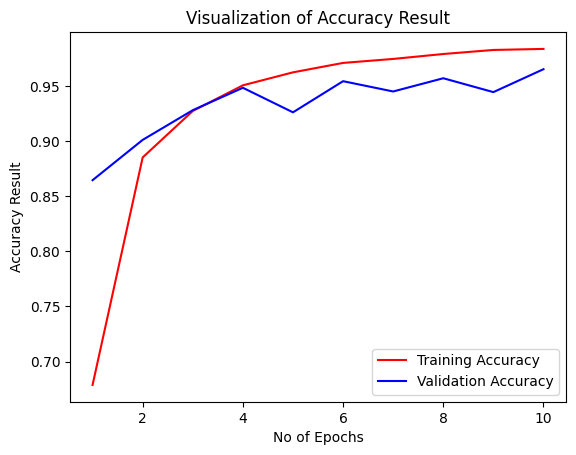

In [61]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model  evaluation

In [62]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17569 files belonging to 38 classes.


In [64]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 16s 29ms/step


(array([[9.9999988e-01, 1.3499944e-07, 2.3830021e-10, ..., 7.6065498e-17,
         4.9413374e-17, 2.4488614e-13],
        [9.9999917e-01, 8.5504593e-07, 1.6161767e-08, ..., 3.2661004e-15,
         9.7784448e-16, 1.1160000e-13],
        [1.0000000e+00, 2.0061237e-09, 2.4808480e-10, ..., 1.7058446e-17,
         2.2476344e-17, 7.3906945e-14],
        ...,
        [3.1946130e-11, 6.8593919e-18, 3.2731261e-13, ..., 4.0066271e-12,
         3.0107773e-16, 9.9999547e-01],
        [5.4934796e-11, 1.2011827e-17, 1.1767670e-12, ..., 2.3517325e-11,
         6.1531943e-14, 1.0000000e+00],
        [1.3240832e-14, 1.2592170e-18, 2.4411352e-16, ..., 7.0600726e-17,
         6.9533247e-16, 1.0000000e+00]], dtype=float32),
 (17569, 38))

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [67]:
predicted_categories

<tf.Tensor: shape=(17569,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17569, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17569,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

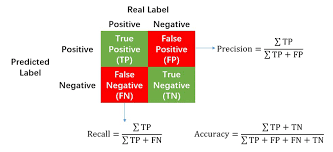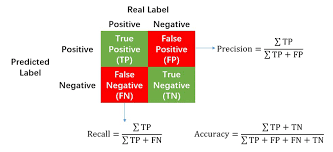

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.92      0.99      0.96       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.93       407
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

In [71]:
cn =confusion_matrix(Y_true,predicted_categories)
cn

array([[482,   3,   2, ...,   0,   0,   0],
       [  4, 483,   3, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 478]], dtype=int64)

## Confusion Matrix Visualization

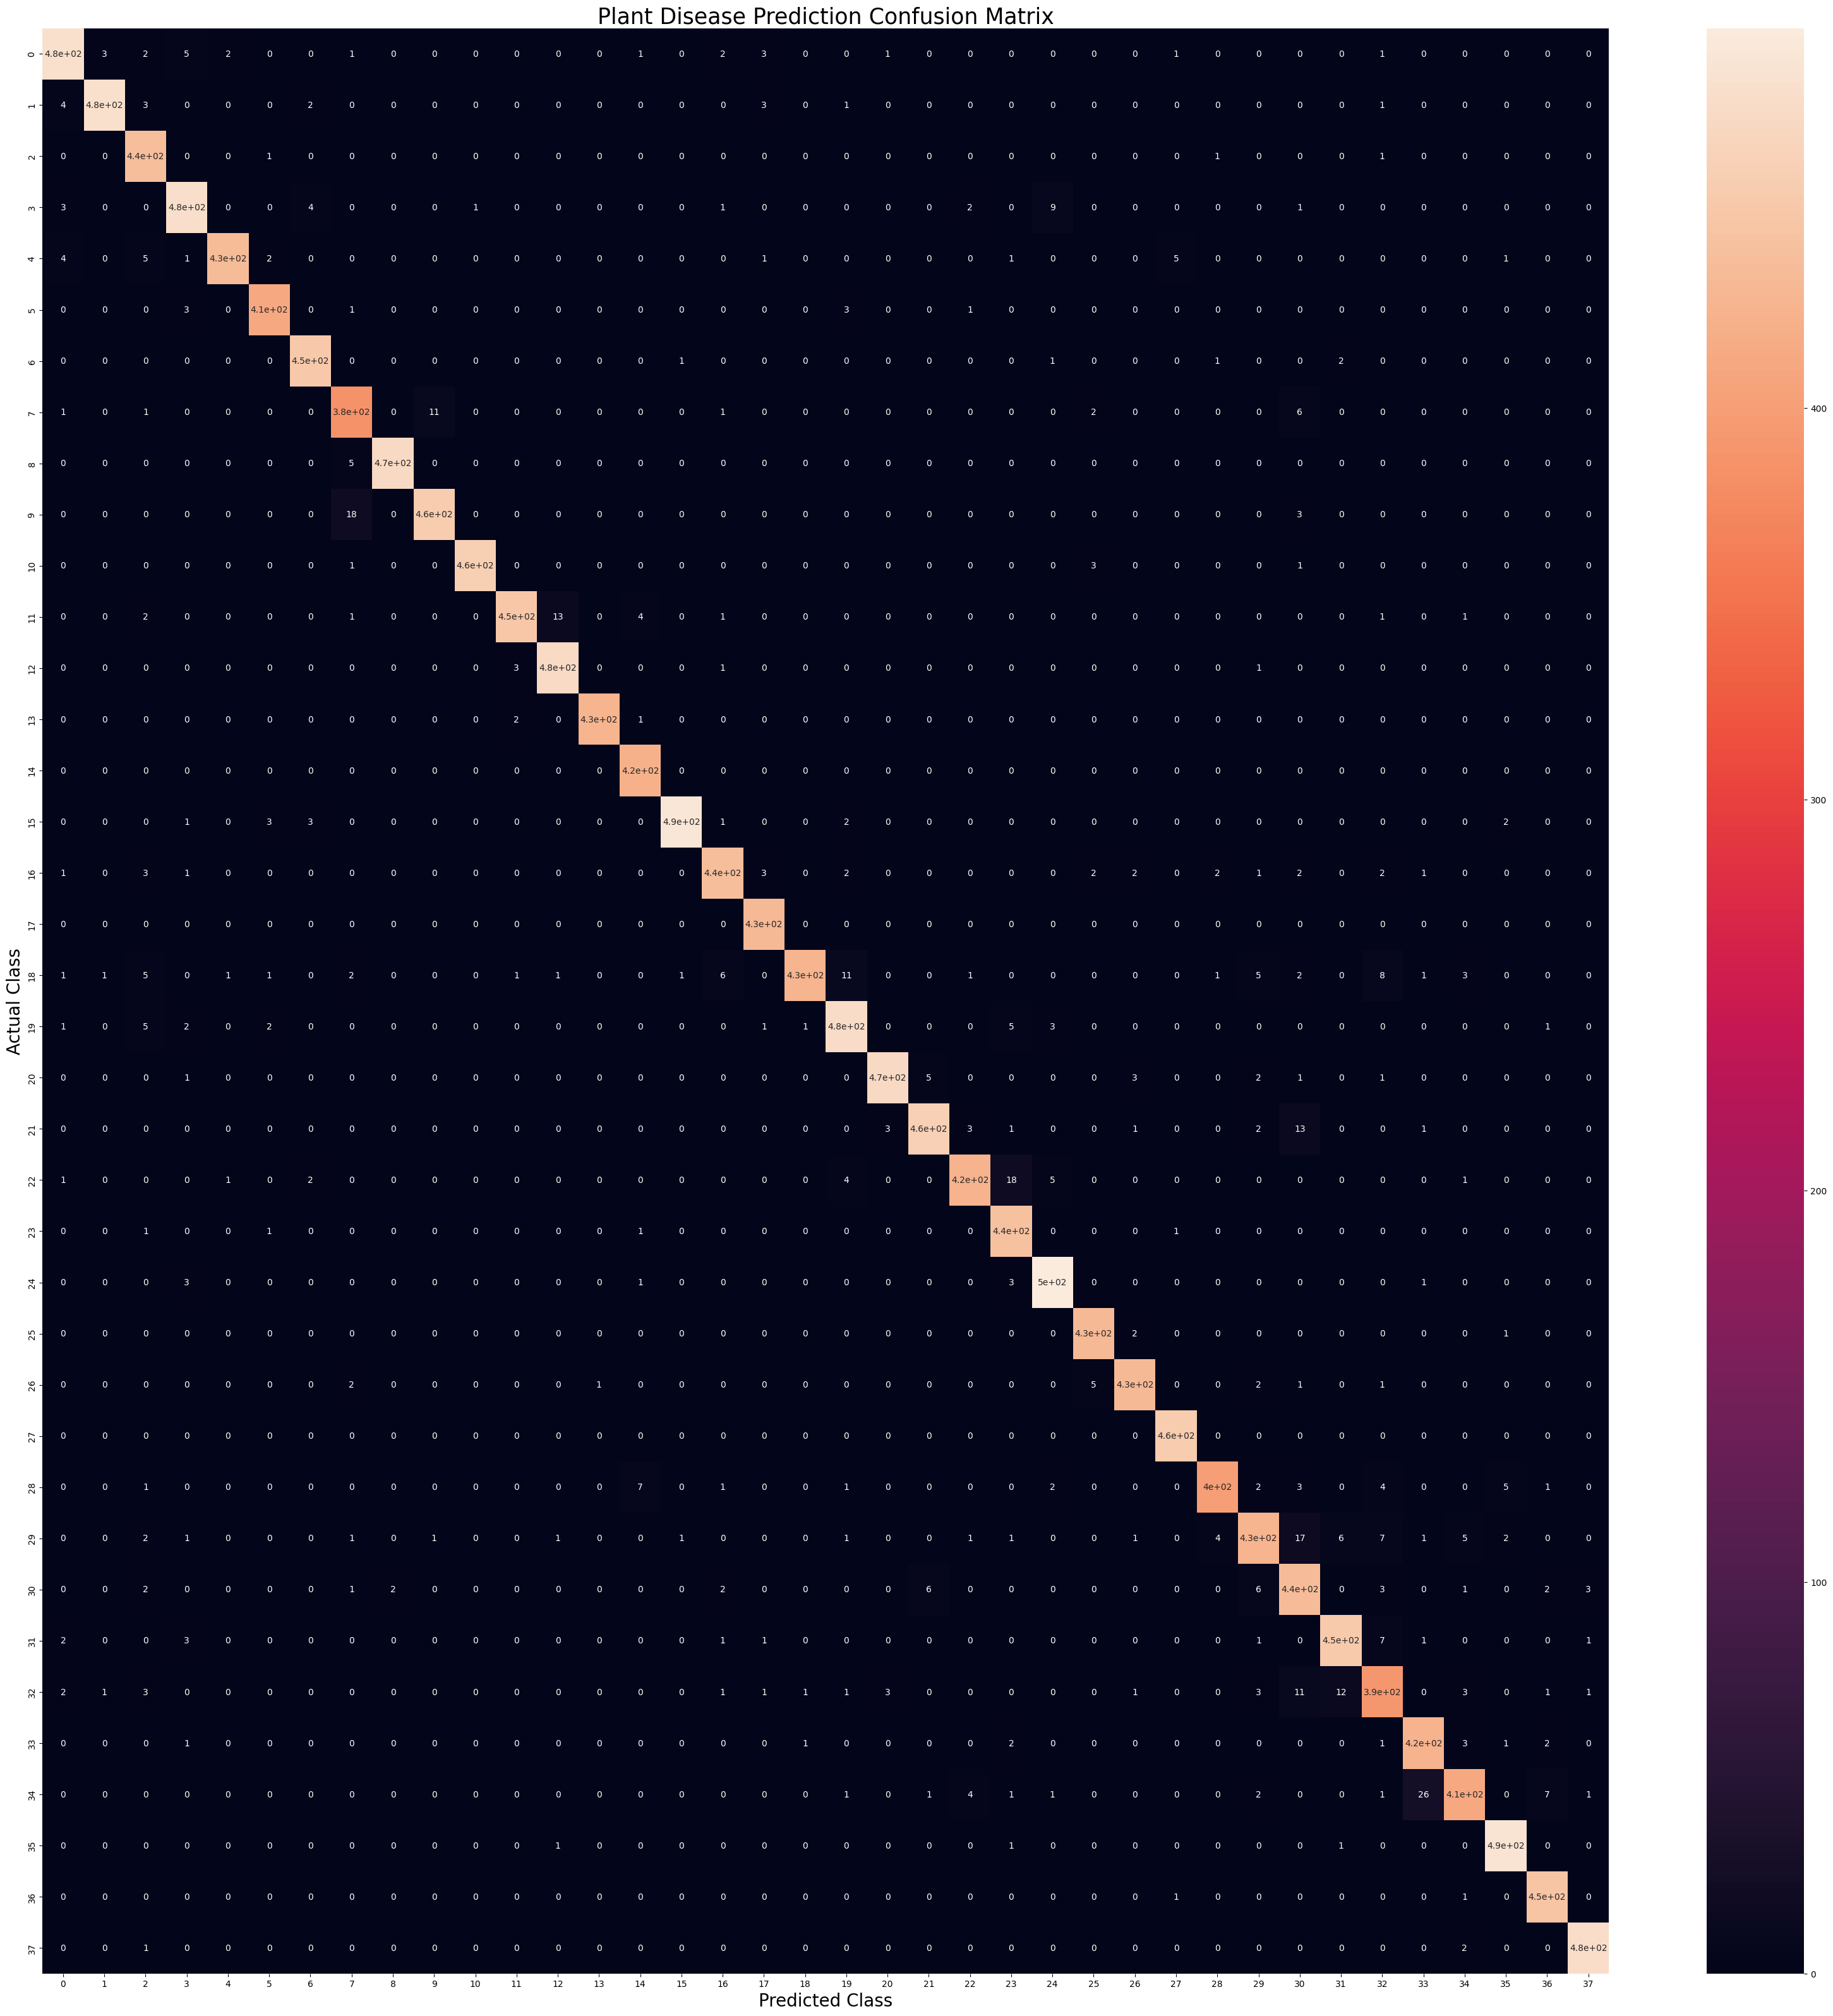

In [72]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()